In [1]:
import numpy as np
import pandas as pd
import os
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
image_size = (28,28)
channels = 1
folder_path = r"digits"
labels = os.listdir(folder_path)

In [3]:
#Creating a dataset for the images in all folders
X = []
y = []
for label in labels:
    image_folder = os.path.join(folder_path, label)
    images = os.listdir(image_folder)
    for img_id in images:
        image = Image.open(os.path.join(image_folder, img_id)).convert("L")
        X.append(np.array(image).reshape(784))
        y.append(label)

X = np.array(X)
y = np.int_(y)

In [4]:
print(X.shape)
print(y.shape)

(3456, 784)
(3456,)


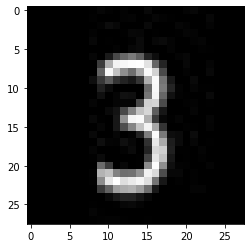

In [5]:
plt.imshow(X[1000].reshape(28,28), cmap = "gray")